# 01_data_loading.ipynb

# AED Data Loading and Preparation
# This notebook focuses on loading and preparing the AED (Automated External Defibrillator) data for further analysis.

# Import necessary libraries

Original AED Data:
     id  type                address  number  postal_code municipality  \
0  13.0  None    Blvd. Fr. Roosevelt    24.0       7060.0     SOIGNIES   
1  70.0  None        Ch. De Wégimont    76.0       4630.0      Ayeneux   
2  71.0  None  Place Saint - Lambert     NaN       4020.0        Liège   
3  72.0  None          Rue du Doyard     NaN       4990.0     Lierneux   
4  73.0  None     Fond Saint Servais     NaN       4000.0        Liège   

  province location public available hours  
0  Hainaut     None      Y      None  None  
1    Liège     None   None      None  None  
2    Liège     None   None      None  None  
3    Liège     None   None      None  None  
4    Liège     None   None      None  None  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15227 entries, 0 to 15226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            15225 non-null  float64
 1   type    

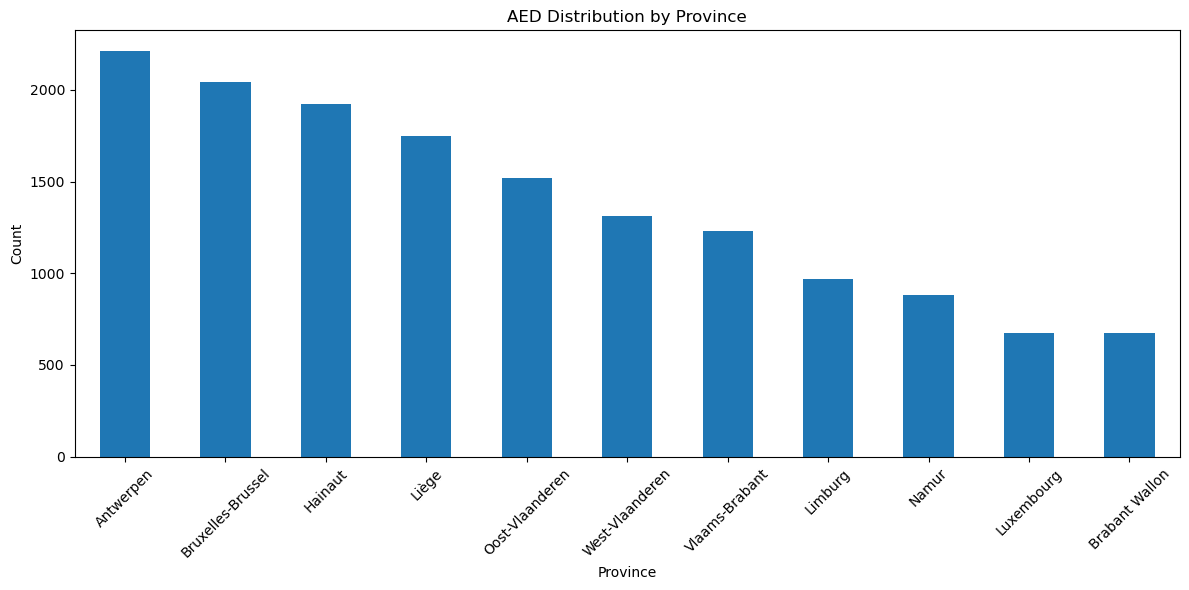


Merged AED dataset saved to: /Users/Zhuanz/数字游民/mda 项目/mda_project/data/processed/aed_total_coordinates.csv
Total number of AED locations: 15226

Data Comparison:
Original AED data count: 15227
Merged geocoded AED data count: 15226
Note: The number of records in the original and merged datasets differ.
This may be due to data cleaning or geocoding processes.


In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the base path for our project
base_path = "/Users/Zhuanz/数字游民/mda 项目/mda_project"

# 1. Loading the original AED data
aed_original = pd.read_parquet(os.path.join(base_path, "data", "raw", "aed_locations.parquet.gzip"))
print("Original AED Data:")
print(aed_original.head())
print("\nDataset Info:")
print(aed_original.info())

# 2. Loading pre-geocoded AED datasets
data_path = os.path.join(base_path, "data", "processed")
aed1 = pd.read_csv(os.path.join(data_path, "aed1.csv"))
aed2 = pd.read_csv(os.path.join(data_path, "aed2.csv"))
aed3 = pd.read_csv(os.path.join(data_path, "aed3.csv"))
aed4 = pd.read_csv(os.path.join(data_path, "aed4.csv"))
aed5 = pd.read_csv(os.path.join(data_path, "aed5.csv"))

# 3. Merging the geocoded datasets
aed_total = pd.concat([aed1, aed2, aed3, aed4, aed5], axis=0)
print("\nMerged AED Data Info:")
print(aed_total.info())

# 4. Basic data exploration
print("\nMissing Values:")
print(aed_total.isnull().sum())
print("\nSummary Statistics:")
print(aed_total.describe())

# 5. Check for duplicate provinces
print("\nUnique provinces:")
print(aed_total['province'].nunique())
print("\nProvince value counts:")
print(aed_total['province'].value_counts())

# 6. Visualizing AED distribution (modified)
plt.figure(figsize=(12, 6))
aed_total['province'].value_counts().plot(kind='bar')
plt.title('AED Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Saving the merged dataset
output_path = os.path.join(data_path, "aed_total_coordinates.csv")
aed_total.to_csv(output_path, index=False)
print(f"\nMerged AED dataset saved to: {output_path}")
print(f"Total number of AED locations: {len(aed_total)}")

# 8. Comparison with original data
print("\nData Comparison:")
print(f"Original AED data count: {len(aed_original)}")
print(f"Merged geocoded AED data count: {len(aed_total)}")

if len(aed_original) != len(aed_total):
    print("Note: The number of records in the original and merged datasets differ.")
    print("This may be due to data cleaning or geocoding processes.")
else:
    print("The number of records in both datasets match.")